#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.02) Sampling Rate and Aliasing</font>

# <font color=red>Give it a Try!
# <font color=red>Part 4

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))
    plt.tick_params(labelbottom = False, bottom = False)

## <font color=red>DSP.02.G4) Multiplying Sine Waves</font>

### <font color=red>DSP.02.G4.a) Multiplying Sine Waves of Different Frequencies</font>

In one or two sentences, describe the difference between adding sine waves of different frequencies
and multiplying sine waves of different frequencies.

**Write answer here.**

### <font color=red>DSP.02.G4.b) Multiplying Sine Waves of Different Frequencies</font>

Here is a timeseries created by multiplying 30 and 200 Hz sine waves.

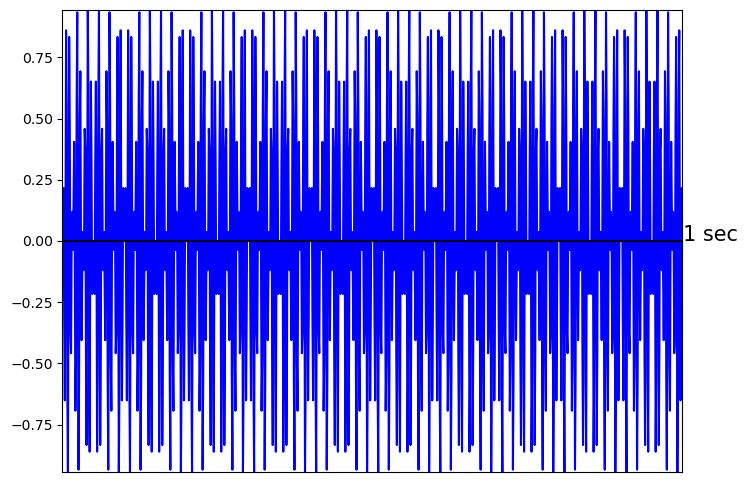

In [2]:
time = np.arange(0,1,0.001)
freq1 = 30
freq2 = 200
timeseries = np.sin(2*np.pi * freq1 * time) * np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

If you were recording this time series, what is the lowest digitization rate you could use? **??**

What is the sampling rate in the above plot? **??**

If we sampled above the Nyquist frequency, what frequencies are contained in the timeseries above? **?? Hz and ?? Hz**

Write some code to produce a spectral plot to show the two frequencies are correctly represented.

### <font color=red>DSP.02.G4.c) Multiplying Sine Waves of Different Frequencies</font>

Here is a timeseries created by multiplying 2300 and 20 Hz sine waves.

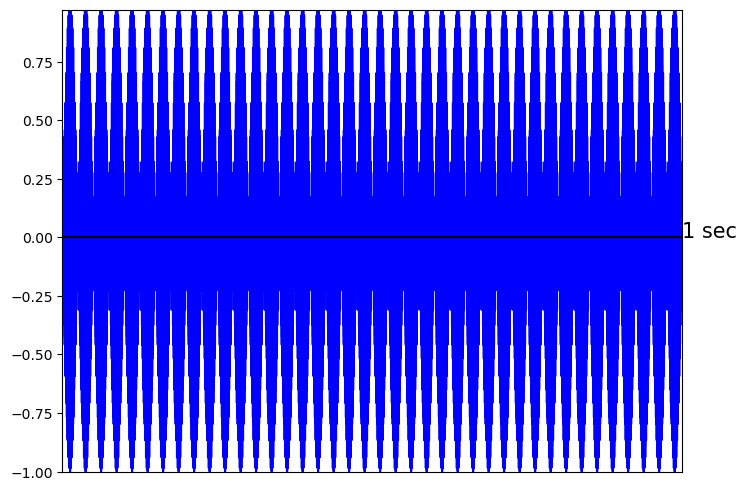

In [4]:
time = np.arange(0,1,0.0001)
freq1 = 2300
freq2 = 20
timeseries = np.sin(2*np.pi * freq1 * time) * np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

If you were recording this time series, what is the lowest digitization rate you could use? **?? Hz**

What is the sampling rate in the above plot? **?? Hz**

If we sampled above the Nyquist frequency, what frequencies are contained in the timeseries above? **?? Hz and ?? Hz**

Write some code to produce a spectral plot to show that the two frequencies are correctly represented.

### <font color=red>DSP.02.G4.d) Multiplying Sine Waves of Different Frequencies</font>

Here is the multiplication of a 10 Hz and 16 Hz sine wave.

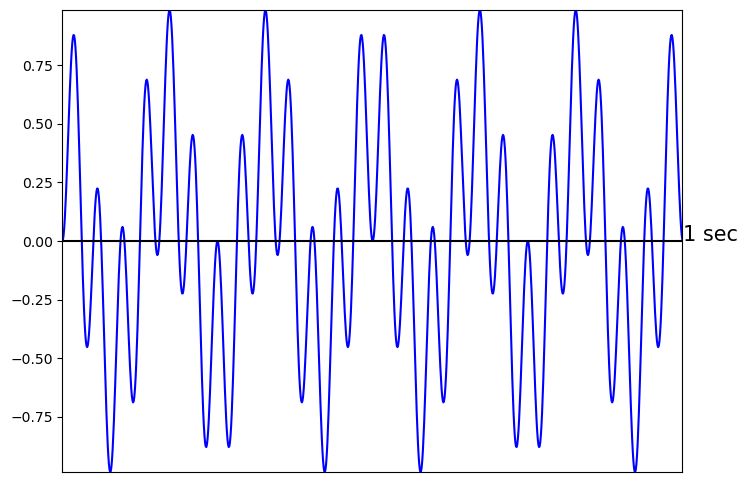

In [6]:
time = np.arange(0,1,0.001)
freq1 = 10
freq2 = 16
timeseries = np.sin(2*np.pi * freq1 * time) * np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

What frequencies compose this new timeseries? **?? Hz and ?? Hz**

What is the mean activity of this new timeseries? **?? Hz**

Write some code to show that you have correctly computed the mean activity.

### <font color=red>DSP.02.G4.e) Multiplying sine waves of the same frequency</font>

Here is the multiplication of a 12 Hz sine wave with another 12 Hz sine wave with the same phase.

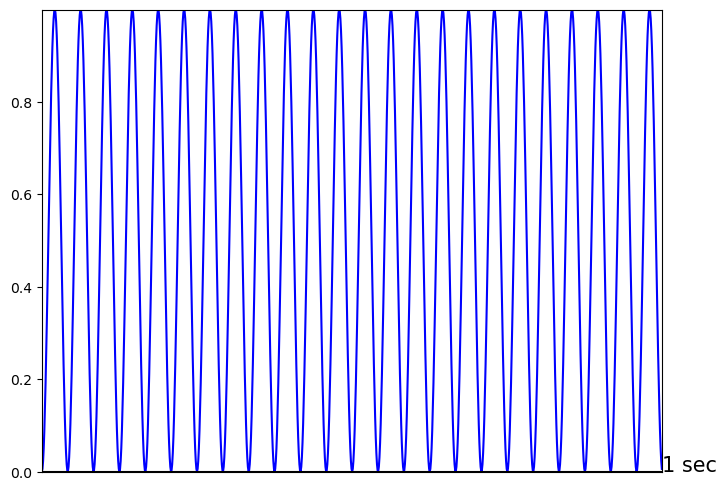

In [8]:
time = np.arange(0,1,0.001)
freq1 = 12
freq2 = 12
timeseries= np.sin(2*np.pi * freq1 * time) * np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

As expected, the result is a 24 Hz timeseries (12 + 12 = 24; 12 - 12 = 0 doesn't produce a waveform.) Why is all the activity above the x axis? 

**Write answer here.**

### <font color=red>DSP.02.G4.f) Multiplying sine waves of the same frequency</font>

Here is the multiplication of two 7 Hz sine waves with the same phase.

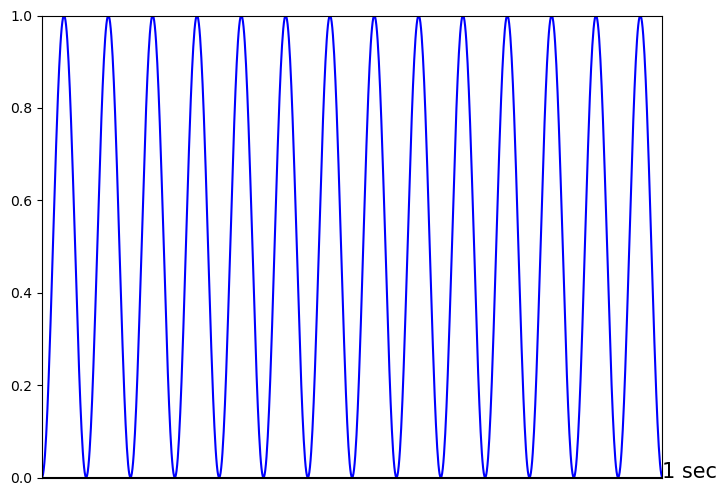

In [9]:
time = np.arange(0,1,0.001)
freq1 = 7
freq2 = 7
timeseries = np.sin(2*np.pi * freq1 * time) * np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

What frequency composes this new timeseries? **?? Hz**

What is the mean activity of this new timeseries? **??**

Use code to show that you have correctly computed the mean activity.

### <font color=red>DSP.02.G4.g) Multiplying sine waves of the same frequency</font>

In each of the examples below, compute the mean activity over a 2π period.

combined[x_] = (5×Sin[3 x]) Sin[3x] mean activity = **??**

combined[x_] = (Sin[34 x]) Sin[34x] mean activity = **??*

combined[x_] = (6×Sin[238 x])(8× Sin[238x]) mean activity = **??**

combined[x_] = (10×Sin[2 x])(14× Sin[2x]) mean activity = **??**

### <font color=red>DSP.02.G4.h) Multiplying sine waves of the same frequency</font>

Suppose you came across the two sine wave timeseries below.

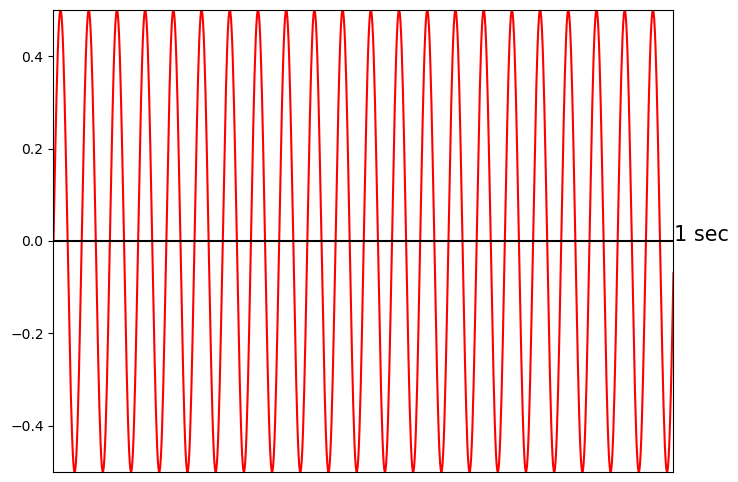

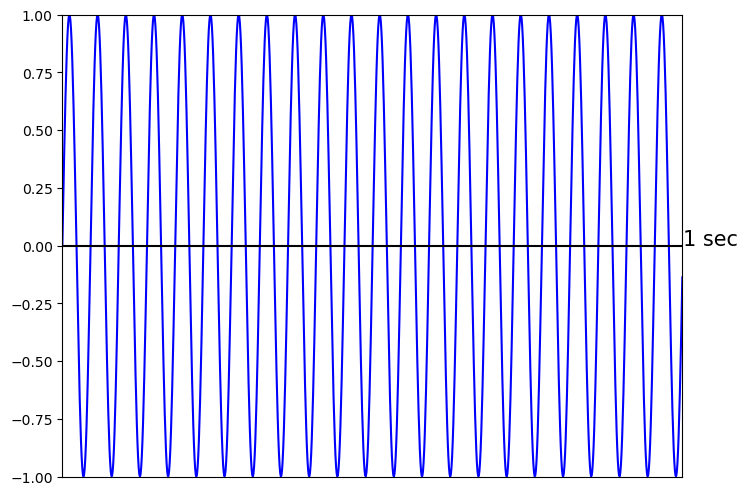

In [15]:
time = np.arange(0,1,0.001)
freq1 = 22
freq2 = 22
timeseries1 = 0.5 * np.sin(2*np.pi * freq1 * time)
timeseries2 = np.sin(2*np.pi * freq2 * time)

make_plot_1(time,timeseries1,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

make_plot_1(time,timeseries2,'b')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

Create a plot and do some calculations to show that the two frequencies are the same.

### <font color=red>DSP.02.G4.i) Multiplying sine waves of the same frequency - a test</font>

Suppose you came across the sine wave timeseries below.

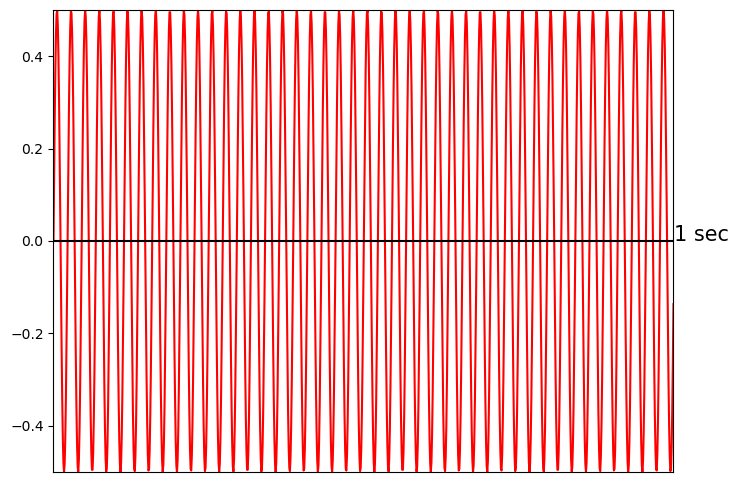

In [18]:
time = np.arange(0,1,0.001)
freq = 44
timeseries = 0.5 * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

There are too many peaks to count to determine the frequency. However, we now know enough that
we can use other techniques to determine the frequency. Use what you know about multiplying sine
waves to find the frequency of the timeseries above.

Hint: Remember that when two sine waves of the same frequency are multiplied, the mean area is non-zero.

    
### <font color=red>DSP.02.G4.j) Multiplying sine waves of the same frequency - a test</font>

Suppose you came across the sine wave timeseries below.

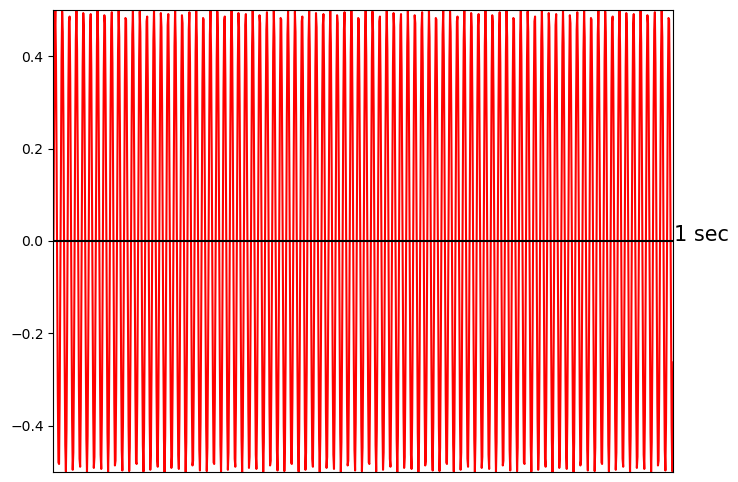

In [16]:
time = np.arange(0,1,0.001)
freq = 88
timeseries = 0.5 * np.sin(2*np.pi * freq * time)

make_plot_1(time,timeseries,'r')
plt.text(1,0,'1 sec',fontsize=15)
plt.show()

There are too many peaks to count to determine the frequency. However, we now know enough that can use other techniques to determine the frequency. Use what you know about multiplying sine
waves to find the frequency.